In [1]:
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # statistical plotting functions
sns.color_palette("viridis", as_cmap=True)
import pandas as pd # dataframes like in R
from copy import deepcopy
import numpy as np
from scipy import stats
import pprint
pp = pprint.PrettyPrinter(indent=2)
import os

current_dir = os.path.dirname(os.path.abspath(''))
project_directory = os.path.dirname(current_dir)

In [2]:
from mempyDEB.DEBODE.simulators import * # functions to run models
from mempyDEB.DEBODE.defaultparams import * # some default parameter configurations

In [3]:
# automatische aktualisierung externer Python-Dateien
%load_ext IPython.extensions.autoreload
%autoreload 2 

# Einbindung zusätzlicher Funktionen 
from utils import * 
from ModelFitting import *

In [5]:
from Ex03_TKTDFitting_Folsomia import *

data = load_data()
data
# _ = plot_data(data)

,t_day,length_mm,C_W,T_cels,S
0,0,0.712222,0,15,1.940575
1,2,0.812500,0,15,2.522833
2,5,0.925714,0,15,3.271466
3,9,1.137143,0,15,4.928376
4,12,1.370000,0,15,7.142787
...,...,...,...,...,...
206,61,2.385000,0,25,21.551484
207,65,2.420000,0,25,22.186077
208,68,2.440000,0,25,22.552820
209,72,2.463333,0,25,22.984470


c:\Users\hanna\projects\mempyDEB\Ex03_TKTDFitting_Folsomia.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
c:\Users\hanna\projects\mempyDEB\Ex03_TKTDFitting_Folsomia.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [a.legend().remove() for a in np.ravel(ax)[1:]]


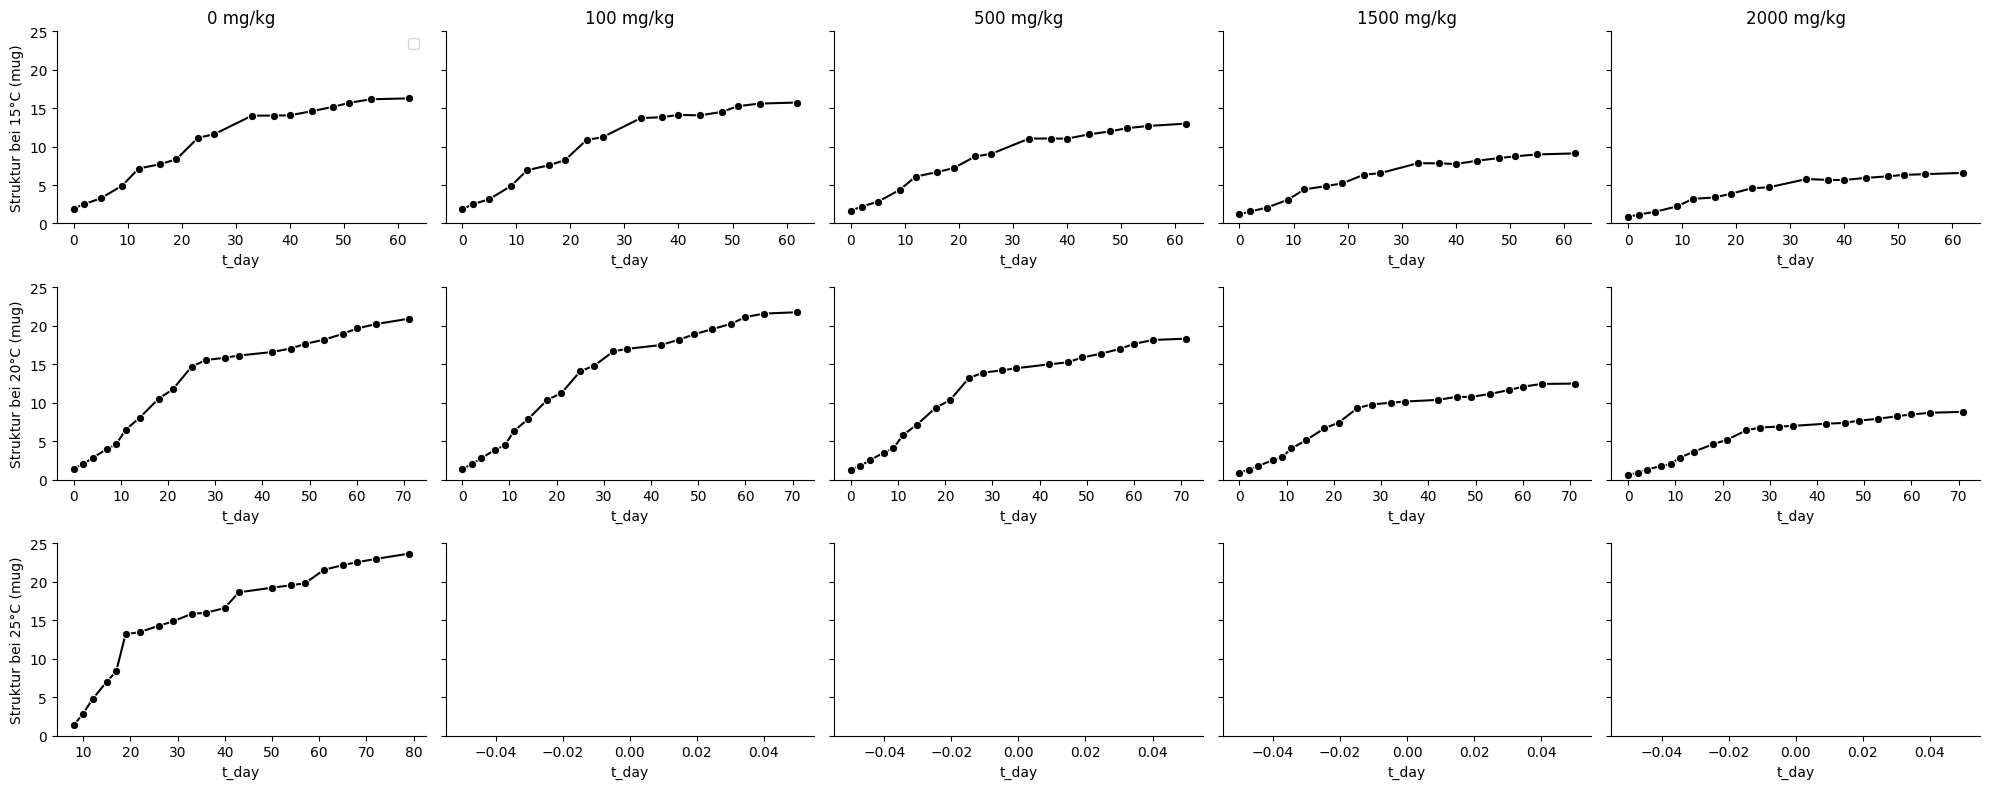

In [6]:
_ = plot_data(data)

prediction for 288.15:                         S         R         X_emb             X          D_j  \
t_day C_W                                                                      
-6    0    0     0.000010  0.000000  9.478447e-01  3.059630e+04     0.000000   
      100  81    0.000010  0.000000  9.478447e-01  3.059630e+04     0.000000   
      500  162   0.000010  0.000000  9.478447e-01  3.059630e+04     0.000000   
      1500 243   0.000010  0.000000  9.478447e-01  3.059630e+04     0.000000   
      2000 324   0.000010  0.000000  9.478447e-01  3.059630e+04     0.000000   
...                   ...       ...           ...           ...          ...   
 74   0    80   15.471995  7.067462 -2.079426e-05  2.410529e+06     0.000000   
      100  161   0.017153  0.000000 -2.060999e-07  2.411048e+06   100.000097   
      500  242   0.007539  0.000000 -2.045141e-08  2.411051e+06   500.000043   
      1500 323   0.004785  0.000000 -3.331386e-09  2.411053e+06  1500.000198   
      2000 404   

c:\Users\hanna\projects\mempyDEB\Ex03_TKTDFitting_Folsomia.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
c:\Users\hanna\projects\mempyDEB\Ex03_TKTDFitting_Folsomia.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [a.legend().remove() for a in np.ravel(ax)[1:]]


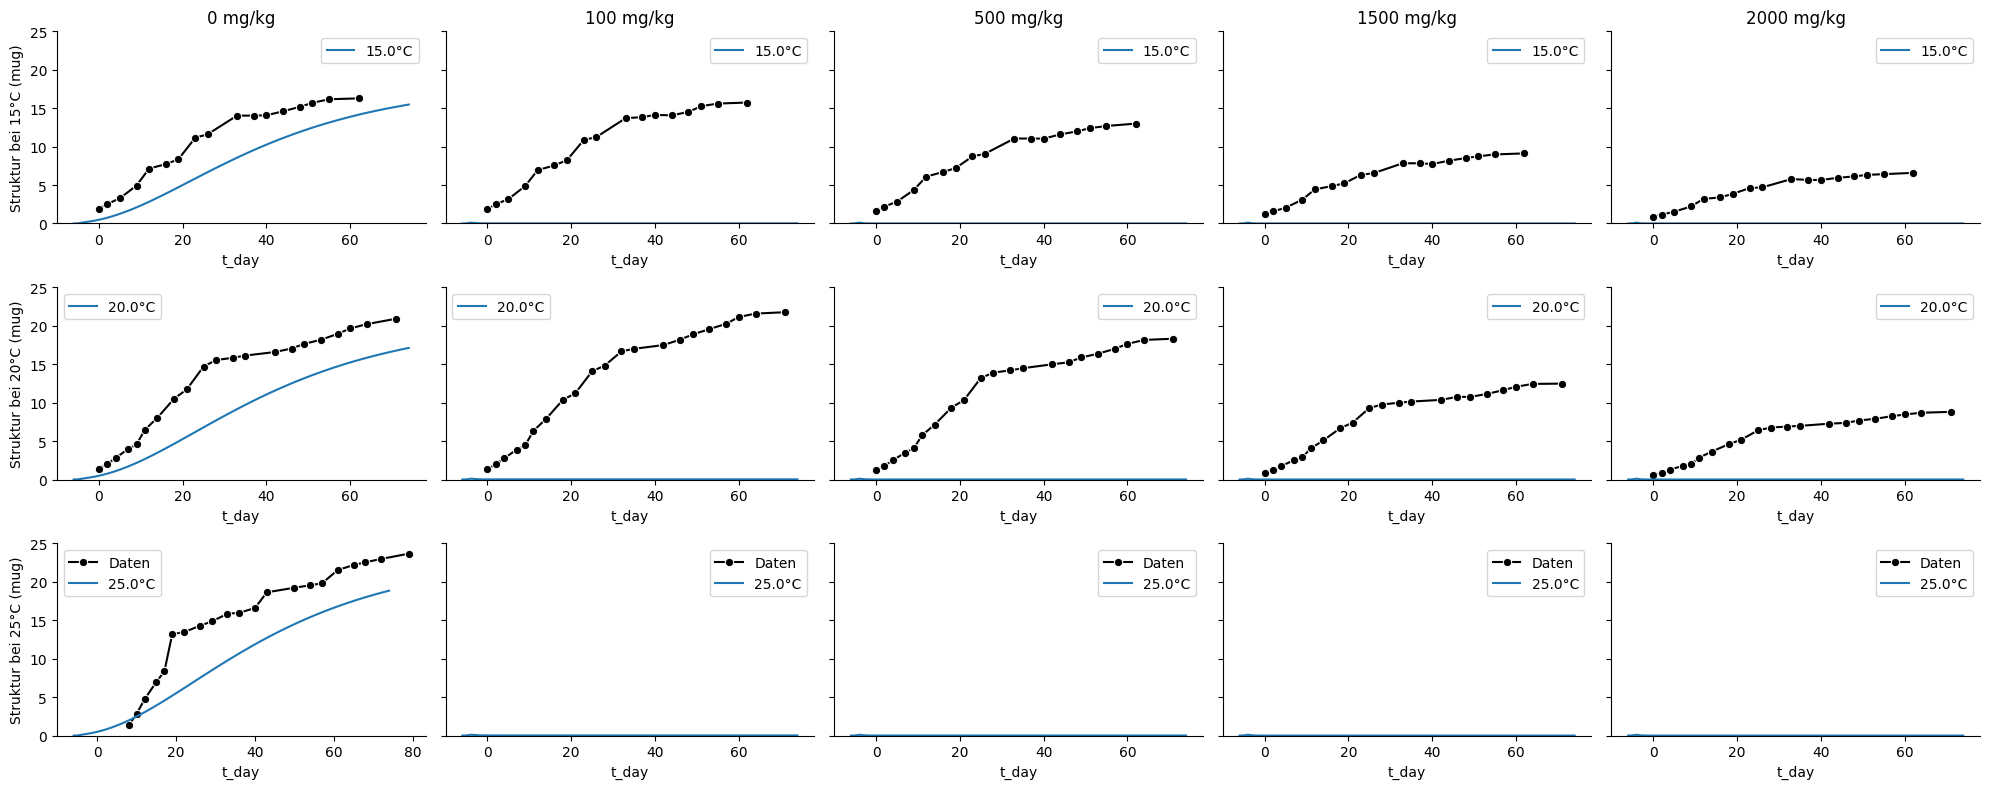

In [11]:
f = setup_modelfit('M')

sim_intguess = f.simulator(f.intguess)
fig, ax = plot_data(f.data)
ax = plot_sim(ax, sim_intguess)

In [23]:
f.run_optimization() 

Fitted model using Nelder-Mead method. Results stored in `optimization_result`


In [24]:
f = fit_model()

KeyboardInterrupt: 

In [8]:
res = f.simulator(f.intguess)

<Axes: xlabel='t_day', ylabel='S'>

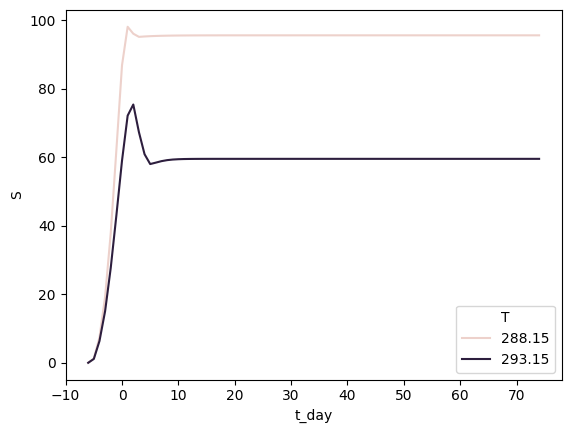

In [9]:
sns.lineplot(res, x = 't_day', y = 'S', hue='T')